# Week 9 Mini Assignment
## Importing packages and reading in the data files

In [14]:
import pandas as pd
import numpy as np

users_courses = pd.read_excel('data/C4UsersCourses.xlsx')
courses = pd.read_excel("data/C4Courses.xlsx")
comments = pd.read_excel("data/C4Comments.xlsx")
questions = pd.read_excel("data/C4Questions.xlsx")

## Lets see what the data looks like using the head() function from pandas

In [15]:
display(users_courses.head())
display(courses.head())
display(comments.head())
display(questions.head())


,user,course_id,Team
0,636031,21320,Black
1,635993,21320,Black
2,636008,21320,Black
3,636010,21320,Black
4,635988,21320,Black


,CourseID,CourseName,StartDate,Deadline_Comment,Deadline_Question
0,21320,NUTM2001 Mon,2020-04-27,2020-05-12 01:00:10,2020-05-05 01:00:10
1,21326,NUTM2001 Tues,2020-04-28,2020-05-13 01:00:10,2020-05-06 01:00:10
2,21327,NUTM2001 Wed,2020-04-29,2020-05-14 01:00:10,2020-05-07 01:00:10
3,21328,NUTM2001 Thurs,2020-04-30,2020-05-15 01:00:10,2020-05-08 01:00:10


,Comment_ID,course_id,Timestamp,user,Question_ID,Comment
0,7197674,21320,2020-04-30 19:57:28,635978,4470201,"This is a good question, i do think it's a lit..."
1,7197679,21320,2020-04-30 20:00:46,635978,4468999,"This is a really good question, i like the str..."
2,7199285,21320,2020-05-01 15:43:35,636026,4471345,It is a good question. Slightly tricky but not...
3,7202419,21320,2020-05-03 13:28:57,635990,4472540,I think this is a really good question! I thin...
4,7202425,21320,2020-05-03 13:34:57,635990,4472481,This question requires the students to recall ...


,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,...,answer,question,numAlts,altA,altB,altC,altD,altE,explanation,AcademicMark
0,4464532,21320,2020-04-27 18:51:25,635990,3.78,10,9,2,1.2222,8,...,D,Operons are a series of related genes that are...,4,A,B,C,D,NaN,<p>Because the bacteria only wants to make th...,NaN
1,4464967,21320,2020-04-27 22:56:37,636029,3.25,7,4,1,0.7500,5,...,D,The sigma (&sigma;) subunit is required for th...,5,The &sigma; subunit decreases the general;affi...,The &sigma; subunit recognizes the promoter se...,The &sigma; subunit can be reused again and ag...,The &sigma; subunit clings onto the core polym...,Binding of the sigma subunit is an important s...,<p>The sigma subunit can direct the tight bin...,NaN
2,4468332,21320,2020-04-29 18:19:30,636019,2.80,13,10,0,0.5000,10,...,C,Which of the following answers provides <stron...,4,RNA polymerase has no;proofreading ability to ...,RNA;polymerase has insufficient bases for pair...,RNA polymerase has to trigger mutations that a...,RNA;polymerase has longer strand for transcrip...,NaN,<p>Wrong - Answer A:&nbsp;RNA polymerase has ...,3.0
3,4468396,21320,2020-04-29 19:15:16,635992,0.00,0,0,0,0.0000,0,...,B,Rifampicin is an example of an antibiotic that...,5,Initiation; RNA polymerase cannot bind to prom...,Elongation; inability to process RNA synthesis...,Termination; No stop signal can be recognized ...,Elongation; inability to unwind DNA then cause...,None of the above is the correct answer.,<p>The correct answer is B.&nbsp;</p><p>&nbsp...,NaN
4,4468400,21320,2020-04-29 19:15:16,635992,2.86,11,7,0,1.0000,8,...,B,Rifampicin is an example of an antibiotic that...,5,Initiation; RNA polymerase cannot bind to prom...,Elongation; inability to process RNA synthesis...,Termination; No stop signal can be recognized ...,Elongation; inability to unwind DNA then cause...,None of the above is the correct answer.,<p>The correct answer is B.&nbsp;</p><p>&nbsp...,NaN


## Scoping out the domain of our data

In [16]:
print('There are {} User records which contain {} attributes'.format(users_courses.shape[0], users_courses.shape[1]))
print('There are {} unique users'.format(users_courses['user'].nunique()))
print('There is {} course across {} days '.format(courses['CourseName'].nunique(), courses['CourseID'].nunique()))
print('There are {} unique teams'.format(users_courses['Team'].nunique()))



There are 289 User records which contain 3 attributes
There are 289 unique users
There is 4 course across 4 days 
There are 9 unique teams


In [17]:
print('The team colours are:')
print(users_courses.Team.unique())

The team colours are:
['Black' 'Blue' 'Brown' 'Green' 'Pink' 'Red' 'Yellow' 'White' 'Purple']


## What is the average academic mark & rating per course?

,CourseName,course_id,AcademicMark,avg_rating
1,NUTM2001 Thurs,21328,3.557143,3.325714
0,NUTM2001 Mon,21320,3.750000,3.420000
2,NUTM2001 Tues,21326,3.793103,3.616782
3,NUTM2001 Wed,21327,3.933333,3.440667


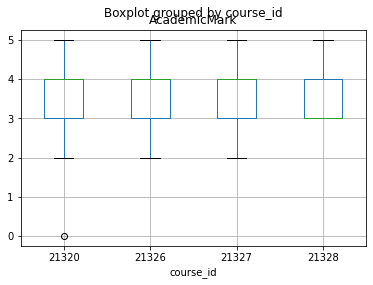

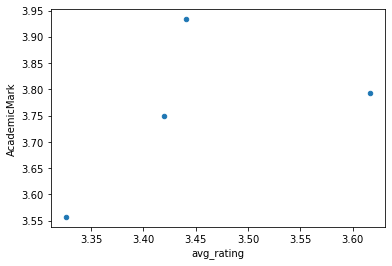

In [27]:
user_scores = questions[['user','AcademicMark', 'avg_rating']].merge(users_courses[['user','course_id']], on='user', how='inner').dropna().merge(courses[['CourseID','CourseName']], left_on='course_id', right_on='CourseID')

# What is the spread of the Academic Marks by day? Are they closely packed?
user_scores.boxplot('AcademicMark', 'course_id')

# Lets group by Team Name to see how the teams perform against each other
course_scores = user_scores[['course_id','AcademicMark', 'avg_rating','CourseName']].groupby('CourseName', as_index=False).mean().sort_values('AcademicMark')
display(course_scores)


# Is there a correlation between avg rating and academic mark?
course_scores.plot.scatter(x='avg_rating',y='AcademicMark')

## What is the average academic mark & rating per team?

,Team,avg_rating,AcademicMark
5,Purple,3.774118,4.058824
7,White,3.772917,4.041667
1,Blue,3.866061,4.000000
6,Red,3.427895,3.842105
3,Green,3.433784,3.783784
4,Pink,3.525526,3.763158
0,Black,3.269722,3.611111
8,Yellow,3.283226,3.580645
2,Brown,3.096053,3.447368


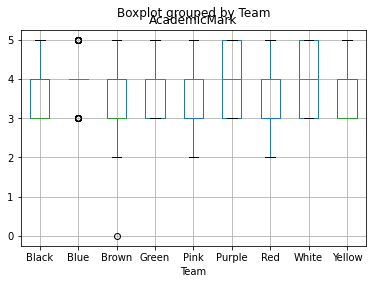

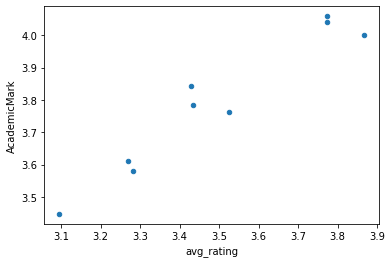

In [24]:
user_scores = questions[['user','avg_rating', 'AcademicMark']].merge(users_courses[['user','course_id', 'Team']], on='user', how='inner').dropna()


# What is the spread of the Academic Marks by team? Are they closely packed?
user_scores.boxplot('AcademicMark', 'Team')

# Lets group by Team Name to see how the teams perform against each other
team_scores = user_scores[['Team','avg_rating', 'AcademicMark']].groupby('Team', as_index=False).mean().sort_values('AcademicMark', ascending=False)
display(team_scores)


# Is there a correlation between avg rating and academic mark?
team_scores.plot.scatter(x='avg_rating',y='AcademicMark')